# Numpy Refresher with parts taken from 
###### https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html

In [2]:
import numpy as np

In [14]:
for i in range(1,5,1): ##from 1 to 10 excluding 10, range(1,5,1)
    print(i)

1
2
3
4


In [ ]:
for i in enumerate(10):
    print (i)

In [ ]:
for i in range(5): 
    print(i)

In [ ]:
for i in np.linspace(1,10,10):
    print(i)

### Note: Storing an integer (eg) in Python incurs <font color=red>overhead </font> as compared to an integer in a compiled language like C
- a reference count that helps Python silently handle memory allocation and deallocation
- the type of the variable
- specifies the size of the following data members
- contains the actual integer value that we expect the Python variable to represent.

In [ ]:
L = list(range(10))
print(type(L[0]))
print(type(L))

In [ ]:
L2 = [str(c) for c in L] ## for loop style initializer
L2

In [ ]:
L3 = [x for x in range(10)] ## np.array([x ...]) will make it array 
L3

In [ ]:
L4 = [True, "2", 3.0, 4] # heterogeneous lists,
[type(item) for item in L4] 

### But this flexibility comes at a cost: to allow these flexible types, each item in the list must contain its own type info, reference count, and other information–that is, each item is a complete Python object

### Fixed-type NumPy-style arrays lack this flexibility, but are much more efficient for storing and manipulating data.

In [ ]:
list(map(type,L4)) ## This is the same as above 

In [ ]:
kobe = np.array([1,2,3,4])
type(kobe[0])

In [ ]:
kobe = np.array([1.0,2,3,4])
type(kobe[0])

In [ ]:
kobe = np.array([1,2,3,4],dtype='float32')
type(kobe[0])

In [ ]:
kobe = np.array([range(i, i + 3) for i in [2, 4, 6]])
kobe

In [ ]:
np.mean(kobe,axis=0)

In [ ]:
print('the maximum of each column is',*np.max(kobe,axis=0))

In [ ]:
print('the maximum of each row is',*np.max(kobe,axis=1))

In [ ]:
print(*map(np.mean,kobe))

In [ ]:
print(*map(lambda x: np.mean(x),kobe))

In [ ]:
fruits = ['lemon', 'pear', 'watermelon', 'tomato']
print(fruits)
print(*fruits,sep=', ')

In [ ]:
np.full((3,3,3),np.pi)

In [ ]:
np.arange(0,20,2) ## similar to `seq` function is R seq(0,20,by=2)

In [ ]:
np.linspace(0,20,2)## similar to `seq` function is R seq(0,20,length.out=2)

In [ ]:
np.random.normal(0,1,(3,3,3)) # mean 0 and std of 1

In [ ]:
np.random.random((3, 3, 3))

In [ ]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty(5)

In [70]:
np.random.seed(2021)
np.random.randint(0, 10, (3, 3, 3))

array([[[4, 5, 9],
        [0, 6, 5],
        [8, 6, 6]],

       [[6, 6, 1],
        [5, 7, 1],
        [1, 5, 2]],

       [[0, 3, 1],
        [0, 2, 6],
        [4, 8, 5]]])

In [71]:
np.zeros(10, dtype='int16') ## equivalent to np.zeros(10, dtype=np.int16)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

In [72]:
x = np.array([np.arange(1,10,1)]).reshape(3,3)
print('x=','\n'
,x)
y = np.array([np.arange(1,13,1)]).reshape(2,6)
print('y=','\n', y)

x= 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
y= 
 [[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]


### The first element of the augmented axis is the same as before such operation, the indexing of the rest axises remain the same

In [73]:
x[:,None,:] 

array([[[1, 2, 3]],

       [[4, 5, 6]],

       [[7, 8, 9]]])

In [95]:
x[:,None,:][:,:,0] ## the first slice of the 3d cube

array([[1],
       [4],
       [7]])

In [87]:
x[:,None,:][:,0,:] 

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [96]:
x[:,None,:][0,:,:]

array([[1, 2, 3]])

In [101]:
x[:,:,None] ## imagine it as a 3d cube (7 behind 4 behind 1)

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]],

       [[7],
        [8],
        [9]]])

In [100]:
x[:,:,None][0,:,:]

array([[1],
       [2],
       [3]])

In [99]:
x[:,:,None][:,0,:]

array([[1],
       [4],
       [7]])

In [ ]:
## normalizing the rows by its row sums
x_norm = (x.T/np.sum(x,axis=1)).T
print('normalized array:',"\n" ,x_norm)
print('row sum is (should be 1): ', np.sum(x_norm,axis=1))

In [ ]:
np.sum(x,1)[:,None] ## note: np.sum(x,1).T won't do the following

In [ ]:
np.sum(x,axis=1).reshape(3,1) ## this will do the same as above

In [ ]:
x_norm = x/np.sum(x,axis=1,keepdims=True) ## 
print('normalized array by row:',"\n" ,x_norm)
print('row sum is (should be 1):',"\n", np.sum(x_norm,axis=1,keepdims=True))

In [ ]:
np.sum(x,axis=0,keepdims=True)

In [ ]:
x_norm = x/np.sum(x,axis=0,keepdims=True) ## 
print('normalized array by column:',"\n" ,x_norm)
print('col sum is (should be 1): ', np.sum(x_norm,axis=0,keepdims=True))

## Indexing in numpy array

#### unlike Python lists, NumPy arrays have a fixed type. 

In [ ]:
np.random.seed(2021)
x_int = np.random.randint(0,10,(3,4))
x_int

In [ ]:
x_int[2,-1]

In [ ]:
# x[start:stop:step]
x_int[0:2,:]

In [ ]:
x_int[0:2,1::2]

In [ ]:
x_int[1:,::-1]# all elements, reversed for the second and third row

In [ ]:
x_int[1:,::-2]# reversed every other for the second and third row

In [ ]:
x_int[::-1, ::-1]# reversed the row and column all together

In [ ]:
## won't change the type unlike list
x_int[0,0] = np.pi
x_int

In [ ]:
print('the shape of x is:', '\n', x_int.shape)
print('the size of x is:','\n', x_int.size)

#### Subarrays as no-copy views
One important–and extremely useful–thing to know about array slices is that they return views rather than copies of the array data. This is one area in which NumPy array slicing differs from Python list slicing: in lists, slices will be copies. 

In [ ]:
x_int_sub = x_int[:2,:2]
x_int_sub

In [ ]:
x_int_sub[0,0] = 300
x_int_sub

In [ ]:
x_int ## original copy has also been changed

In [ ]:
###How to actually make a copy of np array object
x_int_sub_copy = x_int[:2,:2].copy()
x_int_sub_copy

In [ ]:
x_int_sub_copy[0,0] = 0
x_int_sub_copy

In [ ]:
x_int_sub

In [80]:
x_vec = np.array(range(10))
x_vec.shape

(10,)

In [84]:
x_vec.reshape((10,1)) ## same as x_vec[:,None]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [83]:
np.newaxis is None #btw these two are the same

True

In [85]:
x_vec_arg = x_vec[None,:] ## row vector 
print(x_vec_arg)
print(x_vec_arg.shape)

[[0 1 2 3 4 5 6 7 8 9]]
(1, 10)


In [ ]:
x_vec_arg2 = x_vec[:,None] ## column vector
print(x_vec_arg2)
print(x_vec_arg2.shape)

In [ ]:
x_vec_arg3 = x_vec[:,:,None] ## will not work, 1->3, needs 2->3 (see below)

In [ ]:
x_vec_arg3 = x_vec_arg2[:,:,None]
x_vec_arg3

In [ ]:
## concatenate and stacking arrays
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
print(np.concatenate([x, y]))
print(np.append(x,y))
print('vertical stack: \n',np.vstack([x,y]))
print('horizontal stack: \n',np.hstack([x,y]))

In [ ]:
z = np.array([np.arange(1,10),np.arange(1,10)[::-1]])
print('z:\n',z)
print('vertical stack: \n',np.vstack([z,z]))
print('horizontal stack: \n',np.hstack([z,z]))

In [ ]:
## splitting arrays
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

In [ ]:
grid = np.arange(16).reshape((4, 4))
upper, lower = np.vsplit(grid, [2])
left, right = np.hsplit(grid, [2])
print('grid:\n',grid)
print('upper:\n',upper)
print('lower:\n',lower)
print('left:\n',left)
print('right:\n',right)

## Numpy functions, vectorization (UFuncs) for speed
## vectorization is to use the broadcasting funcationality
#### https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.03-Computation-on-arrays-ufuncs.ipynb

In [ ]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
%timeit -n 100 compute_reciprocals(values) 

In [ ]:
%timeit -n 100 1/values

In [ ]:
np.arange(5)/np.arange(1,6)

In [ ]:
x = np.arange(9).reshape((3, 3))
print( x ** 2)
print( 2 ** x)

In [ ]:
np.equal(np.power(x,2) ,x**2).sum() == 9

In [2]:
## easy printing
a = 3
b = 4
print(f"a = {a} and b = {b}")

a = 3 and b = 4


In [6]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [7]:
np.empty(5)

array([1.30290084e-311, 6.01334515e-154, 3.54557136e+246, 7.26581901e+223,
       1.96086582e+243])

## Intialize large arrays first with np.empty to save time for memory look up, similar to R

#### https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.03-Computation-on-arrays-ufuncs.ipynb#scrollTo=6w6XohaGjSL9

In [32]:
def init_no (end):
    out = []
    for i in range(end):
        out = np.append(out,i**2)
    return out
%timeit -n 100 init_no(1000)        

3.76 ms ± 50.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
def init_yes (end):
    out = np.empty(end)
    for i in range(end):
        out[i] = i ** 2
    return out
%timeit -n 100 init_yes(1000)

359 µs ± 5.08 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
np.random.seed(2021)
temp_yes = init_yes(1000)
np.random.seed(2021)
temp_no = init_no(1000)
np.sum(temp_no == temp_yes) 

1000

#### Works with array view too

In [48]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [ ]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

If we had instead written ``y[::2] = 2 ** x``, this would have resulted in the creation of a temporary array to hold the results of ``2 ** x``, followed by a second operation copying those values into the ``y`` array.


In [52]:
x = np.arange(1, 6)
np.prod(x)

120

In [ ]:
x = np.arange(1, 6)
np.add.reduce(x) ## same as np.sum(x)
np.multiply.reduce(x) ## same as np.prod(x)

## NumPy's version of the operation is computed much more quickly due to compiled code

In [55]:
big_array = np.random.rand(1000000)
%timeit -n 10 sum(big_array)
%timeit -n 10 np.sum(big_array)##np.nansum is the Nan-safe version, etc below

119 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
508 µs ± 31.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [56]:
%timeit -n 10 min(big_array)
%timeit -n 10 np.min(big_array)

53.8 ms ± 294 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
256 µs ± 22.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [61]:
## .min(),.max(),.sum() are short syntax version but slightly slower
%timeit -n 10 big_array.min()
%timeit -n 10 np.min(big_array)

410 µs ± 64.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
341 µs ± 21.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [63]:
%timeit -n 10 big_array.max()
%timeit -n 10 np.max(big_array)

418 µs ± 96.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
334 µs ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [64]:
%timeit -n 10 big_array.sum()
%timeit -n 10 np.sum(big_array)

709 µs ± 126 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
630 µs ± 118 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
np.percentile(np.random.randn(1000),(2.5,97.5))

array([-1.86370172,  1.87257543])

## Broadcasting

In [111]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(f" a = {a}")
print(f" b = \n {b}")

 a = [0 1 2]
 b = 
 [[0]
 [1]
 [2]]


In [112]:
a+b ## like outer add np.add.outer(a,a)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [149]:
a = np.arange(1000)
b = a[:,None]

%timeit -n 100 a+b
%timeit -n 100 np.add.outer(a,a)

1.95 ms ± 19.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.95 ms ± 4.47 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [113]:
a = np.arange(3)[np.newaxis,:]
b = np.arange(3)[:, np.newaxis]

In [114]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [117]:
M = np.ones((3, 2))
a = np.arange(3)
print(M)
print(a)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


In [118]:
M+a ## will not work, M.T + a will work or a[:,None] + M (transpose relationship)

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [122]:
X = np.random.random((10, 3))
X

array([[0.30515077, 0.30754347, 0.20132266],
       [0.26516495, 0.65092375, 0.15461481],
       [0.3886995 , 0.64761414, 0.84829912],
       [0.0638365 , 0.41444118, 0.33224425],
       [0.72132098, 0.4738473 , 0.79864134],
       [0.0908669 , 0.87455682, 0.77697686],
       [0.77156642, 0.06310333, 0.59443848],
       [0.79249473, 0.27413368, 0.37101981],
       [0.85311454, 0.67872892, 0.75437746],
       [0.41725723, 0.32089873, 0.37229637]])

In [127]:
Xmean = X.mean(axis=0)
Xmean

array([0.46694725, 0.47057913, 0.52042312])

In [129]:
X_cent = X - Xmean
X_cent.mean(axis=0)

array([-2.77555756e-17, -9.99200722e-17,  1.11022302e-17])

In [150]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
print('x dim is',x.shape)
print('y dim is',y.shape)
print('z dim is',z.shape)

x dim is (50,)
y dim is (50, 1)
z dim is (50, 50)


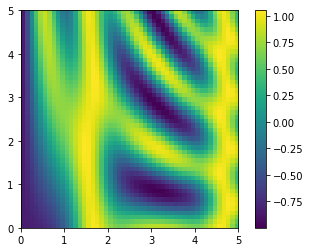

In [151]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

In [179]:
np.random.seed(2021)
x = np.random.randint(0,100,15).reshape(5,3)

In [180]:
np.argwhere(x<6)

array([[0, 2]], dtype=int64)

In [182]:
x[np.where(x<6)]

array([0])

In [195]:
x[x<6]

array([0])

In [183]:
np.sum(x < 6)

1

In [184]:
np.sum(x < 6, axis=1)

array([1, 0, 0, 0, 0])

In [186]:
np.any(x > 8)

True

In [185]:
np.any(x > 8,axis=0)

array([ True,  True,  True])

In [190]:
np.sum((x > 1) & (x < 55))

5

In [194]:
np.sum(~( (x <= 1) | (x >= 55) )) ## ~ means not, complement of above statement

5

In [196]:
np.random.seed(2021)
x = np.random.randint(0,100,10000)

In [202]:
%timeit -n 100 x[x<50] 
%timeit -n 100 x[np.where(x<50)]### faster this way

52.4 µs ± 1.96 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
45.2 µs ± 645 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


## `and` and `or` is different than `&` and `|`

The difference is this: and and or gauge the truth or falsehood of entire object, while `&` and `|` refer to bits within each object.

When you use and or or, it's equivalent to asking Python to treat the object as a single Boolean entity. In Python, all nonzero integers will evaluate as True. Thus:

In [203]:
bool(42), bool(0)

(True, False)

The bool() function returns the boolean value of a specified object.

The object will always return True, unless:

- The object is empty, like `[]`, `()`, `{}`
- The object is False
- The object is 0
- The object is None

In [213]:
bool(42 and 0)

False

In [214]:
bool(42 & 0)

False

In [217]:
bin(42 & 59)

'0b101010'

In [218]:
bin(42 and 59)

'0b111011'

In [219]:
bin(42 or 59)

'0b101010'

In [220]:
bin(42 | 59)

'0b111011'

In [221]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [222]:
A or B ##try to evaluate the entire object, which will not work

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [223]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [224]:
(x > 4) and (x < 8) ## will not work as well

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [227]:
np.random.seed(2021)
x = np.random.randint(100, size=10)

In [228]:
x[[3,5,7]]

array([94, 44, 91])

In [233]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[94, 91],
       [86, 44]])

The shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed:

In [235]:
X = np.arange(12).reshape((3, 4))
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [240]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [238]:
X[X<5]

array([0, 1, 2, 3, 4])

In [241]:
X[row[:, np.newaxis], col] ### row is now transposed, so 3 by 3 broadcasting now

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [242]:
X[2,[1,1,2]]

array([ 9,  9, 10])

In [243]:
X[1:,[1,1,2]]

array([[ 5,  5,  6],
       [ 9,  9, 10]])

In [244]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [2]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = np.random.multivariate_normal(mean,cov,100)
X.shape

(100, 2)

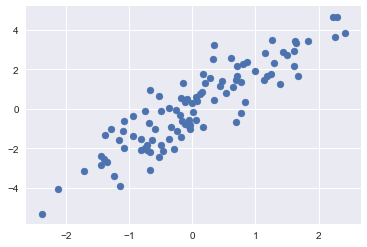

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

In [4]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([ 8, 26,  5, 95,  6, 74, 82, 91, 31, 23, 12, 63, 62, 61, 54, 69, 87,
       27, 39, 68])

In [10]:
selection = X[indices] 
np.array_equal(X[indices,:],X[indices])

True

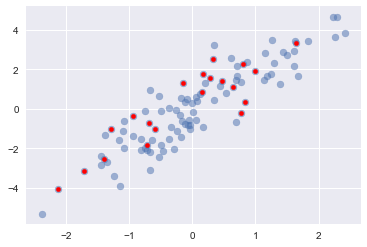

In [16]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='red', s=20);

In [24]:
x = np.zeros(10)
x[[0, 0]] = [4, 6] ## 0 was replaced with 4 and then 6
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1 ## this opertaion is different than above
x 

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [26]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [3]:
np.random.seed(2021)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

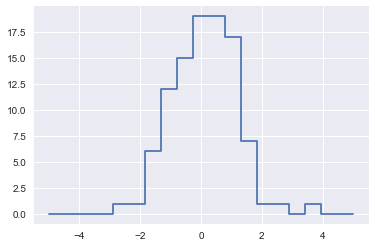

In [37]:
plt.plot(bins, counts, linestyle='steps');

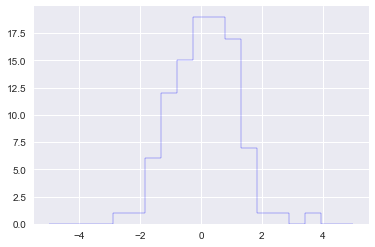

In [38]:
plt.hist(x, bins, histtype='step',color='blue'); ## same thing

In [41]:
print("NumPy routine:")
%timeit -n 100 counts, edges = np.histogram(x, bins)
### much faster with small N
print("Custom routine:")
%timeit -n 100 np.add.at(counts, np.searchsorted(bins, x), 1) 

NumPy routine:
62.6 µs ± 13.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Custom routine:
13.7 µs ± 1.24 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [43]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit -n 10 counts, edges = np.histogram(x, bins)
### slower with large N
print("Custom routine:")
%timeit -n 10 np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
56.5 ms ± 740 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
106 ms ± 187 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Sorting

In [75]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
        #print (x)
    return x

In [76]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [78]:
## jesus taking the wheel sorting
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

In [82]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x) ## default is quicksort

array([1, 2, 3, 4, 5])

In [80]:
x.sort()
x

array([1, 2, 3, 4, 5])

In [85]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x) ## gives index
print(i)
print(x[i])

[1 0 3 2 4]
[1 2 3 4 5]


In [88]:
rand = np.random.RandomState(2021)
X = rand.randint(0, 10, (4, 6))
print(X)

[[4 5 9 0 6 5]
 [8 6 6 6 6 1]
 [5 7 1 1 5 2]
 [0 3 1 0 2 6]]


In [89]:
np.sort(X,axis=0)

array([[0, 3, 1, 0, 2, 1],
       [4, 5, 1, 0, 5, 2],
       [5, 6, 6, 1, 6, 5],
       [8, 7, 9, 6, 6, 6]])

### Sometimes we only want find the k smallest values in the array

In [93]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
x_3 = np.partition(x, 3)
x_3[:3] ## smallest 3, if index is the largest element, it becomes sortting

array([2, 1, 3])

In [ ]:
x_3 

In [94]:
x_2 = np.partition(x, 2)
x_2[:2] ## smallest 2

array([1, 2])

In [104]:
np.partition(X,1,axis=0)

array([[0, 3, 1, 0, 2, 1],
       [4, 5, 1, 0, 5, 2],
       [5, 7, 9, 1, 6, 5],
       [8, 6, 6, 6, 6, 6]])

In [152]:
X = rand.rand(10, 2)
X.shape

(10, 2)

(0, 1)

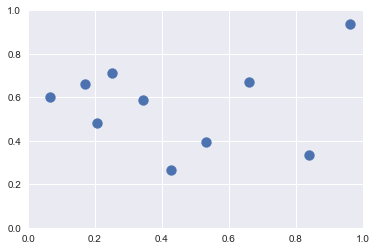

In [153]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);
plt.xlim([0, 1])
plt.ylim([0, 1])

In [154]:
from sklearn.metrics import pairwise_distances as pair_dist

In [162]:
dist_sq2 = pair_dist(X)
dist_sq = np.sqrt(np.sum((X[:, np.newaxis, :] - 
                          X[np.newaxis, :, :]) ** 2, axis=-1))

np.sum(dist_sq-dist_sq2)

-2.914335439641036e-16

In [161]:
## To compute pairwise distance for an array is similar in 2d
xx = np.random.rand(5)
xx_dist = xx[:,None] - xx[None,:]
xx_dist.shape

(5, 5)

In [163]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 6 1 7 8 3 5 9 2 4]
 [1 7 6 9 8 0 2 3 5 4]
 [2 8 5 4 3 9 7 6 1 0]
 [3 5 8 4 2 6 7 9 1 0]
 [4 5 2 3 8 9 7 6 1 0]
 [5 3 4 2 8 7 9 6 1 0]
 [6 7 8 1 0 3 9 5 2 4]
 [7 9 8 6 1 2 3 5 4 0]
 [8 3 2 5 7 4 6 9 1 0]
 [9 7 2 8 1 6 5 3 4 0]]


In [164]:
nearest2 = np.argsort(dist_sq2, axis=1)
print(nearest2)

[[0 6 1 7 8 3 5 9 2 4]
 [1 7 6 9 8 0 2 3 5 4]
 [2 8 5 4 3 9 7 6 1 0]
 [3 5 8 4 2 6 7 9 1 0]
 [4 5 2 3 8 9 7 6 1 0]
 [5 3 4 2 8 7 9 6 1 0]
 [6 7 8 1 0 3 9 5 2 4]
 [7 9 8 6 1 2 3 5 4 0]
 [8 3 2 5 7 4 6 9 1 0]
 [9 7 2 8 1 6 5 3 4 0]]


In [167]:
K = 2
## K+1 including the point itself
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
nearest_partition

array([[0, 6, 1, 7, 8, 5, 3, 9, 2, 4],
       [7, 1, 6, 9, 8, 0, 5, 3, 2, 4],
       [2, 8, 5, 4, 3, 9, 6, 7, 1, 0],
       [3, 5, 8, 4, 2, 6, 7, 9, 1, 0],
       [4, 5, 2, 3, 8, 9, 6, 7, 1, 0],
       [3, 5, 4, 2, 8, 7, 9, 6, 1, 0],
       [6, 7, 8, 1, 0, 3, 9, 5, 2, 4],
       [9, 7, 8, 6, 1, 2, 3, 5, 4, 0],
       [8, 3, 2, 5, 7, 4, 6, 9, 1, 0],
       [9, 7, 2, 8, 1, 5, 6, 3, 4, 0]], dtype=int64)

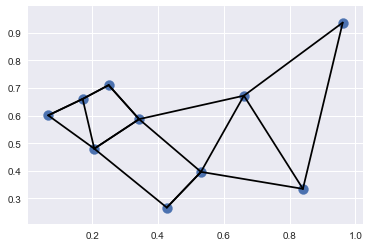

In [168]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')